<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
 
plt.rcParams['figure.figsize'] = [10,7]

#### Load the csv file

In [68]:
df = pd.read_csv('bank.csv')
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


In [69]:
df.shape

(9640, 11)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

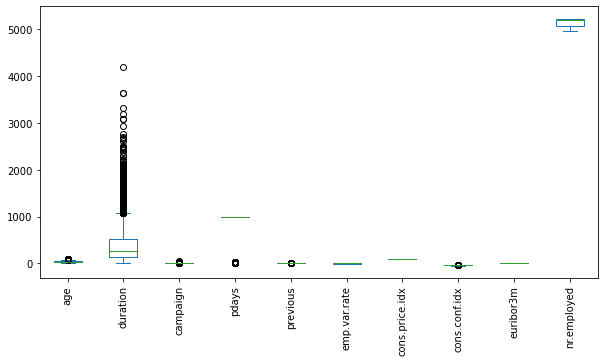

In [71]:
df.drop('y',axis=1).plot(kind='box',figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

In [72]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
UL = q3+1.5*IQR
LL = q1-1.5*IQR
df = df[~((df > UL) | (df < LL)).any(axis=1)]
df = df.reset_index(drop=True)
df.shape

C:\Users\Sai\AppData\Local\Temp\ipykernel_17776\1711102447.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df > UL) | (df < LL)).any(axis=1)]


(6555, 11)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [73]:
df['y'].replace({'yes':1,'no':0},inplace=True)
df['y'].value_counts()

0    4055
1    2500
Name: y, dtype: int64

In [74]:
x = df.drop('y',axis=1)
y = df[['y']]
print(x.columns)
print(y.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Index(['y'], dtype='object')


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
x = x.replace('unknown',np.nan)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [76]:
x.isnull().sum().sum()

0

In [77]:
y.isnull().sum()

y    0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,0
1,25,243,3,999,0,-1.8,92.843,-50.0,1.531,5099.1,1
2,36,214,1,999,0,-0.1,93.200,-42.0,4.120,5195.8,0
3,43,550,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,52,64,1,999,0,1.1,93.994,-36.4,4.855,5191.0,0


In [79]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.013464,0.030657,NaN,NaN,0.034608,0.023411,0.113103,0.041076,0.019658,-0.024066
duration,-0.013464,1.000000,-0.023547,NaN,NaN,-0.014333,-0.001823,-0.044139,-0.028657,-0.022528,0.558858
campaign,0.030657,-0.023547,1.000000,NaN,NaN,0.110618,0.091234,0.011834,0.095196,0.097830,-0.075266
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp.var.rate,0.034608,-0.014333,0.110618,NaN,NaN,1.000000,0.771580,0.203126,0.970017,0.901721,-0.423457
cons.price.idx,0.023411,-0.001823,0.091234,NaN,NaN,0.771580,1.000000,0.061895,0.682713,0.507270,-0.271056
cons.conf.idx,0.113103,-0.044139,0.011834,NaN,NaN,0.203126,0.061895,1.000000,0.277787,0.121665,-0.057895
euribor3m,0.041076,-0.028657,0.095196,NaN,NaN,0.970017,0.682713,0.277787,1.000000,0.946309,-0.423066
nr.employed,0.019658,-0.022528,0.097830,NaN,NaN,0.901721,0.507270,0.121665,0.946309,1.000000,-0.426671


In [80]:
print(df['pdays'].value_counts())
print(df['previous'].value_counts())

999    6555
Name: pdays, dtype: int64
0    6555
Name: previous, dtype: int64


In [173]:
from scipy.stats import pearsonr

In [174]:
for col in df.drop('y',axis=1).columns:
    print(col)
    print(pearsonr(df[col],df['y']))
    print('\n')

age
(-0.024066267123136555, 0.05136871423088146)


duration
(0.5588582969646769, 0.0)


campaign
(-0.07526569537576686, 1.052578851282258e-09)


pdays
(nan, nan)


previous
(nan, nan)


emp.var.rate
(-0.42345696859263715, 1.4604448656419728e-283)


cons.price.idx
(-0.2710564489663915, 9.385609945659442e-111)


cons.conf.idx
(-0.05789489848641309, 2.7269501487047834e-06)


euribor3m
(-0.42306639793870765, 5.470623579993779e-283)


nr.employed
(-0.4266708205448364, 2.606333916480571e-288)




In [81]:
# dropping the columns 'pdays' and 'previous'
x.drop(['pdays','previous'],axis=1,inplace=True)
x.columns

Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

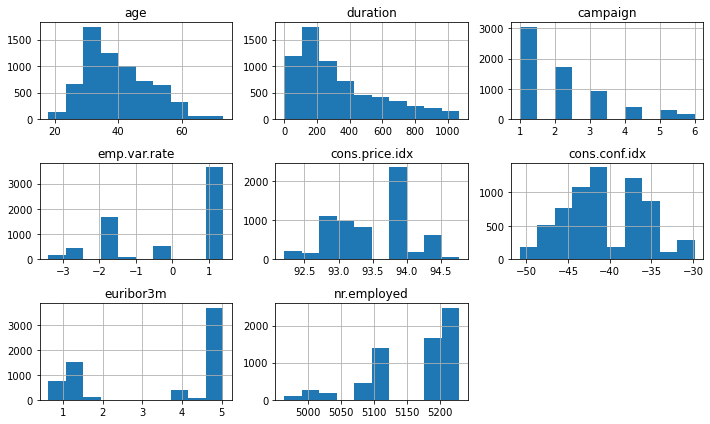

In [82]:
x.hist(figsize=(10,6))
plt.tight_layout()
plt.show()

In [83]:
x.skew()

age               0.598601
duration          1.041608
campaign          1.324147
emp.var.rate     -0.575913
cons.price.idx   -0.214375
cons.conf.idx     0.104692
euribor3m        -0.545969
nr.employed      -0.880652
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


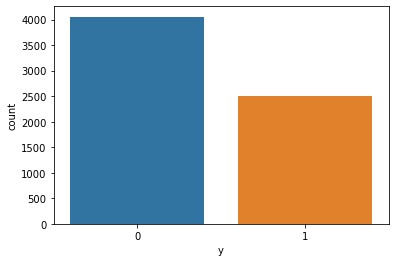

In [84]:
sns.countplot(df['y'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [85]:
from sklearn.preprocessing import StandardScaler

In [88]:
SS = StandardScaler()
x_scaled = SS.fit_transform(x)
X = pd.DataFrame(x_scaled, columns = x.columns)
X.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.722787,-0.480765,-0.024486,0.701361,0.749298,0.910658,0.765585,0.394074
1,-1.410132,-0.330797,0.754670,-1.081276,-1.217928,-2.008221,-1.104009,-0.840708
2,-0.330018,-0.445246,-0.803642,-0.036282,-0.607764,-0.291233,0.350869,0.458567
3,0.357326,0.880787,-0.803642,0.701361,0.749298,0.910658,0.765023,0.394074
4,1.241055,-1.037225,-0.803642,0.701361,0.749298,0.910658,0.763899,0.394074


<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [96]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5244, 8)
(1311, 8)
(5244, 1)
(1311, 1)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [111]:
def plot_confusion_matrix(model, test_data):

    y_pred = model.predict(test_data)

    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

#### Define a function to plot the ROC curve.

In [168]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.plot([0, 1], [0, 1],'r--')
    
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
from sklearn.metrics import accuracy_score

In [114]:
KNN = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_model = KNN.fit(X_train,y_train)
knn_y_pred = knn_model.predict(X_test)
print('Accuracy from KNN model:',accuracy_score(y_test,knn_y_pred))

Accuracy from KNN model: 0.8497330282227308


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [109]:
from sklearn.metrics import confusion_matrix

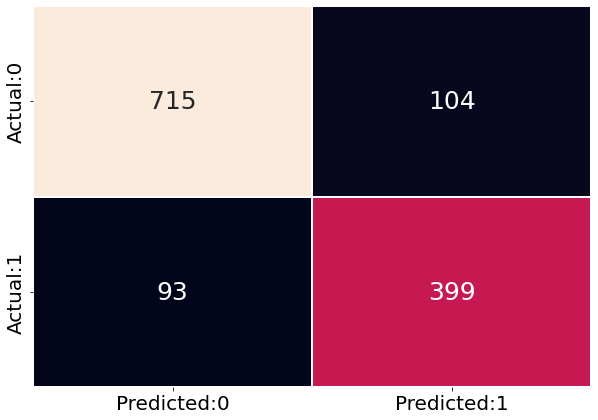

In [135]:
plot_confusion_matrix(knn_model,X_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [115]:
from sklearn.model_selection import GridSearchCV

In [120]:
knn_tuned_params = {'n_neighbors' : np.arange(1, 25, 2),'metric' : ['hamming','euclidean','manhattan','Chebyshev']}

In [121]:
KNN_grid = GridSearchCV(estimator=KNN,param_grid=knn_tuned_params,cv=3,n_jobs=-1)
KNN_grid.fit(X_train,y_train)
KNN_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 15}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [124]:
from sklearn.metrics import classification_report

In [122]:
KNN_tuned_model = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 15)
KNN_tuned_model.fit(X_train,y_train)
knn_tuned_ypred = KNN_tuned_model.predict(X_test)
pd.DataFrame(knn_tuned_ypred).value_counts()
print("Accuracy from Tuned KNN model:",accuracy_score(y_test, knn_tuned_ypred))

Accuracy from Tuned KNN model: 0.858886346300534


In [125]:
print(classification_report(y_test, knn_tuned_ypred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       819
           1       0.79      0.85      0.82       492

    accuracy                           0.86      1311
   macro avg       0.85      0.86      0.85      1311
weighted avg       0.86      0.86      0.86      1311



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [129]:
from sklearn.metrics import roc_curve,roc_auc_score

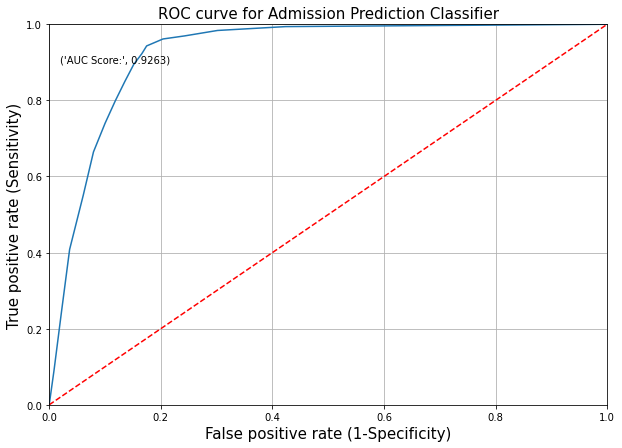

In [138]:
plot_roc(KNN_tuned_model)

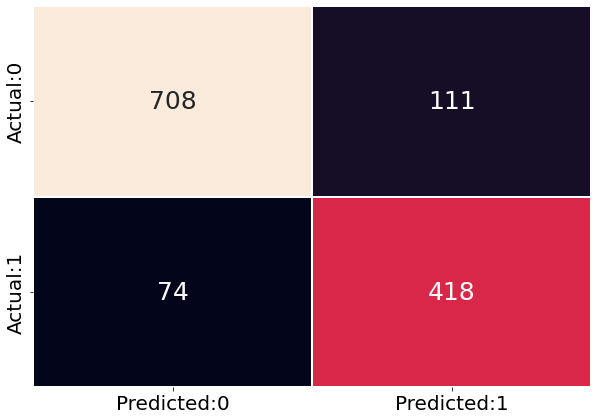

In [141]:
plot_confusion_matrix(KNN_tuned_model,X_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [142]:
cm = confusion_matrix(y_test,knn_tuned_ypred)
cm

array([[708, 111],
       [ 74, 418]], dtype=int64)

In [144]:
wrong_pred = cm[0][1]+cm[1][0]
right_pred = cm[0][0]+cm[1][1]
total = cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]
print('Percentage of misclassified observations:',round(wrong_pred/total*100,2))
print('Percentage of correctly classified observations:',round(right_pred/total*100,2))

Percentage of misclassified observations: 14.11
Percentage of correctly classified observations: 85.89


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [147]:
accuracy = []
for i in range(1,25,2):
    knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    tuned_ypred = knn.predict(X_test)
    pd.DataFrame(tuned_ypred).value_counts()
    score = accuracy_score(y_test,tuned_ypred)
    accuracy.append(score)
print(accuracy)

[0.8230358504958047, 0.8497330282227308, 0.8573607932875668, 0.8672768878718535, 0.8710907704042715, 0.8672768878718535, 0.8703279938977879, 0.8642257818459191, 0.8665141113653699, 0.8657513348588863, 0.8634630053394355, 0.8657513348588863]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

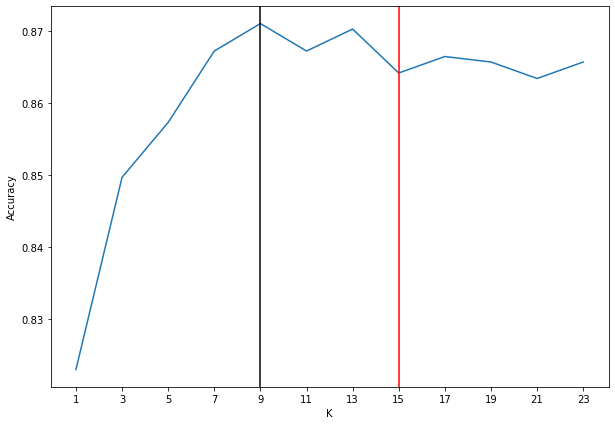

In [152]:
n_neighbors = np.arange(1, 25, 2)
sns.lineplot(n_neighbors,accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 25,2))
plt.axvline(x = 15, color = 'red')
plt.axvline(x = 9, color = 'black')
plt.show()

In [150]:
knn_tuned_params = {'n_neighbors' : np.arange(1, 25, 2)}
knn = KNeighborsClassifier(metric= 'euclidean')
KNN_grd = GridSearchCV(estimator=knn,param_grid=knn_tuned_params,cv=3,n_jobs=-1)
KNN_grd.fit(X_train,y_train)
KNN_grd.best_params_

{'n_neighbors': 9}

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [153]:
from sklearn.naive_bayes import GaussianNB

In [154]:
NB = GaussianNB()

In [157]:
nb_model = NB.fit(X_train,y_train)
nb_y_pred = nb_model.predict(X_test)
pd.DataFrame(nb_y_pred).value_counts()

0    748
1    563
dtype: int64

In [159]:
print(classification_report(y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       819
           1       0.66      0.75      0.70       492

    accuracy                           0.76      1311
   macro avg       0.75      0.76      0.75      1311
weighted avg       0.77      0.76      0.76      1311



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

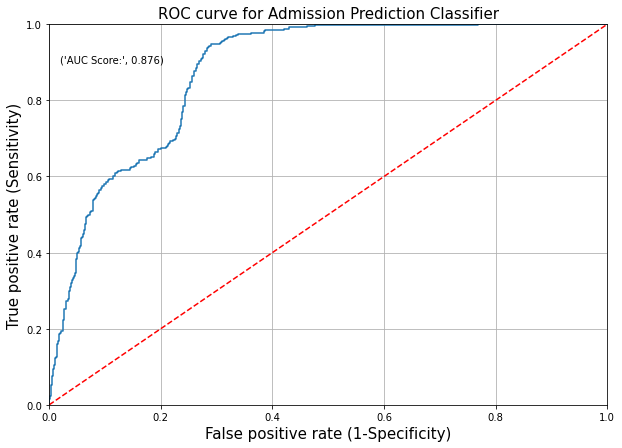

In [160]:
plot_roc(nb_model)

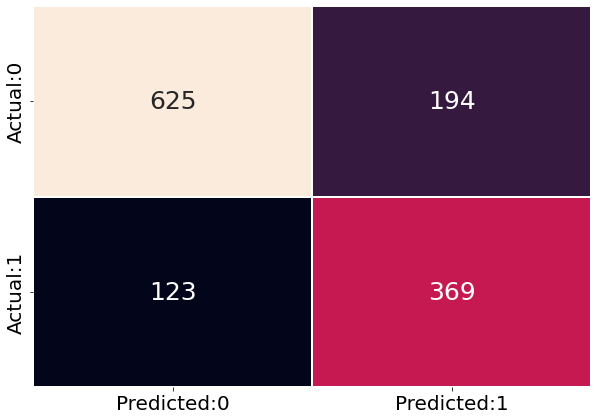

In [161]:
plot_confusion_matrix(nb_model,X_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [162]:
from sklearn.model_selection import cross_val_score

In [167]:
nb = GaussianNB()
score = cross_val_score(nb,X_train,y_train,cv=10,scoring='accuracy')
print('Average accuracy from 10 fold cross validation:',score.mean())

Average accuracy from 10 fold cross validation: 0.7841363140676119
